<Body>   
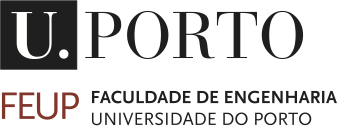   
<h1> <b>Machine Learning 2022/2023 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt),
**Aníbal Matos** (anibal@fe.up.pt),
**Daniel Costa** (danielgcosta@fe.up.pt),
**Rui Gonçalves** (rjpg@fe.up.pt)

FEUP, Feb. 2023

---


# **Project #01**

**Note:** This is to be done in group of **2** elements. Use this notebook to answer all the questions. At the end of the work, you should **upload** the **notebook** and a **pdf file** with a printout of the notebook with all the results in the **moodle** platform. 

**Deadlines:** Present the state of your work (and answer questions) on the week of **March 27** in your corresponding practical class. Upload the files until 23:59 of **April 7, 2023**.


---



In [218]:
# To make a nice pdf file of this file, you have to do the following:
# - upload this file into the running folder (click on the corresponding left icon)
# Then run this (which will make a html file into the current folder):
!jupyter nbconvert --to html "ML_project1.ipynb"
# Then just download the html file and print it to pdf!

[NbConvertApp] Converting notebook ML_project1.ipynb to html
[NbConvertApp] Writing 916642 bytes to ML_project1.html


# **Identification**

* **Group:** ProjectA05C
* **Name:** Carlos Thadeu Aguiar de Faria
* **Student Number:** 202202472

* **Name:** Paulo Martins de Almeida
* **Student Number:**


---




**Initial setup:** To download the file **data-set.cvs**, run the next cell.

In [3]:
!wget -O dataset.csv.zip https://www.dropbox.com/s/9y0s2ogjovkwrbm/data-set.csv.zip?dl=0 --quiet
!unzip dataset.csv.zip -d. 


Archive:  dataset.csv.zip
replace ./data-set.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [26]:
# Then, run this code to get the data-set

import pandas as pd
df = pd.read_csv('data-set.csv', index_col=0)
df.tail()

# By convention, values that are zero signify no measurements.
# The units are:
# [m] for x and y
# [m/s] for the velocities vx and vy
# [m] for the LIDAR ranges

,time,x,y,vx,vy,angle -179,angle -178,angle -177,angle -176,angle -175,...,angle 171,angle 172,angle 173,angle 174,angle 175,angle 176,angle 177,angle 178,angle 179,angle 180
495,49.5,3.855108,-3.928327,-0.078142,-0.093745,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,49.6,0.000000,0.000000,-0.088140,-0.103430,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,49.7,0.000000,0.000000,-0.078002,-0.092986,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,49.8,0.000000,0.000000,-0.076514,-0.091199,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499,49.9,0.000000,0.000000,-0.078499,-0.092891,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Part 1: Kalman filter design**



Consider a holonomic mobile robot in the 2D plan and suppose that one can get measurements from its linear velocity every time step $t=0, 0.1, 0.2, \ldots$ (in seconds) and its position every time step $t=0, 0.5, 1.0, 1.5 \ldots$ (in seconds). Suppose also that the measurements are corrupted by additive Gaussian noise and furthermore, the linear velocity measurements may also include a unknown but constant bias term. The goal is to obtain an estimate of the position of the robot together with a measure of its uncertainty. To this end, we will implement a Kalman filter (KF)!
 
### **Model:**
Let $(x_t, y_t)$ be the position of the robot at time step $t$, and $(v_{x,t}, v_{y,t})$ its linear velocity. Let $(b_{x,t}, b_{y,t})$ be the bias term and $w_t$ and $\eta_t$ Gaussian noises. Then, a state-space model to design the KF can be written as


$$*x-direction*
\begin{align*}
\begin{bmatrix}
x_{t+1} \\
b_{x,t+1}
\end{bmatrix}
&= \begin{bmatrix}
1 &h \\
0 &1
\end{bmatrix}
\begin{bmatrix}
x_{t} \\
b_{x,t}
\end{bmatrix}
+\begin{bmatrix}
h \\
0
\end{bmatrix}
v_{x,t}
+ w_{x,t} \quad t=0, 0.1, 0.2, \ldots \\
z_{x,t} &= 
\begin{bmatrix}
1 & 0
\end{bmatrix}
\begin{bmatrix}
x_{t} \\
b_{x,t}
\end{bmatrix} +  \eta_{x,t}, \quad t=0, 0.5, 1.0, 1.5 \ldots
\end{align*}

*y-direction*
\begin{align*}
\begin{bmatrix}
y_{t+1} \\
b_{y,t+1}
\end{bmatrix}
&= \begin{bmatrix}
1 &h \\
0 &1
\end{bmatrix}
\begin{bmatrix}
y_{t} \\
b_{y,t}
\end{bmatrix}
+\begin{bmatrix}
h \\
0
\end{bmatrix}
v_{y,t}
+ w_{y,t} \quad t=0, 0.1, 0.2, \ldots \\
z_{y,t} &= 
\begin{bmatrix}
1 & 0
\end{bmatrix}
\begin{bmatrix}
y_{t} \\
b_{y,t}
\end{bmatrix} +  \eta_{y,t}, \quad t=0, 0.5, 1.0, 1.5 \ldots
\end{align*}$$
where $(z_{x,t}, z_{y,t})$ is the output vector and $h=0.1\,s$ is the sample time.

**Note:** We have decomposed the model in two decoupled parts (x and y directions). Thus, it is possible to design a KF for each direction.

**1.1** 
Implement 2 KFs (one for each direction) and display the evolution along time of the estimated position of the robot and the estimated bias term. Display also the estimated trajectory 2D.

In [27]:
# Main variables.
import numpy as np
from numpy import * 
import matplotlib.pyplot as plt

time = df["time"].values
x = df["x"].values
y = df["y"].values
vx = df["vx"].values
vy = df["vy"].values

In [29]:
# KalmanFilter Class
import numpy as np 

class KalmanFilter:
    """Class to make Kalman Filter iterations."""
    def __init__(self) -> None:
        pass
    
    def predict(self, X, P, A, Q, B, U): 
        """      
        X : The mean state estimate of the previous step (k-1) - shape(m,1) 
        P : The state covariance of previous step (k-1) - shape(m,m) 
        A : The transition  matrix - shape(m,m) 
        Q : The process noise covariance matrix - shape(m,m) 
        B : The input effect matrix - shape(p, m) 
        U : The control input - shape(q,1)
        """ 
        X = A @ X + B @ U 
        P = A @ P @ A.T + Q 
        return(X, P) 

    def update(self, X, P, Y, H, R): 
        """      
        K  : the Kalman Gain matrix 
        IS : the Covariance or predictive mean of Y  
        """
        IS = H @ P @ H.T + R  
        K = P @ H.T @ np.linalg.inv(IS) 
        X = X + K @ (Y - H @ X) 
        P = P - K @ IS @ K.T 
        # P = P - K @ H @ P 
        return (X, P)

In [30]:
# Plotting Class
import matplotlib.pyplot as plt

class Plot:
    """Class to plot everything."""
    def __init__(self, n) -> None:
        self.XPx = np.zeros(n)
        self.XPy = np.zeros(n)
        # XUx = np.zeros(n)
        # XUy = np.zeros(n)
        # Yx = np.zeros(n)
        # Yy = np.zeros(n)
        # XPxPlus = np.zeros(n)
        # XPxMinus = np.zeros(n)
        # XUxPlus = np.zeros(n)
        # XUxMinus = np.zeros(n)

    def update(self, i, XPx, XPy) -> None: # , XUx, XUy, Yx, Yy, XPxPlus, XPxMinus, XUxPlus, XUxMinus
        self.XPx[i] = XPx
        self.XPy[i] = XPy
        # XUx[i] = XUx
        # XUy[i] = XUy
        # Yx[i] = Yx
        # Yy[i] = Yy
        # XPxPlus[i] = XPxPlus
        # XPxMinus[i] = XPxMinus
        # XUxPlus[i] = XUxPlus
        # XUxMinus[i] = XUxMinus

    def plot(self, axis) -> None: # , XUx, XUy, Yx, Yy, XPxPlus, XPxMinus, XUxPlus, XUxMinus
        plt.plot(axis, self.XPx, color='black',label="Corrected X position")
        plt.plot(axis, self.XPy, color='red',label="Corrected X bias")
        # plt.plot(Yx, Yy, 'o', color='blue',label="measured")
        plt.legend()
        plt.grid()
        plt.show()


In [215]:
# State space system variables.
# Time step.
dt = 0.1

# State space model matrices.
A = np.array([[1., dt], [0., 1.]]) 
B = np.array([[dt], [0.]])
H = np.array([[1., 0.]])

# Initial state estimate and state covariance matrices.
X = np.array([[0.], [0.]]) 
P = np.array([[999., 0.], [0., 999.]])

# Measurement and process covariance matrices assuming uncorrelated Gaussian noise. Arbitrarily chosen.
Q = np.array([[5., 0.], [0., 5.]])
R = np.array([[1.]])

# Initial arbitrary measurement.
Y = np.array([[0]])

# Initial arbitrary control input matrix.
U = np.array([[0.]])

In [32]:
# Iteration variables
# range = np.linspace(0, len(df)*dt - dt, len(df))
df_rows = np.linspace(0, len(df) - 1, len(df))
kf = KalmanFilter()

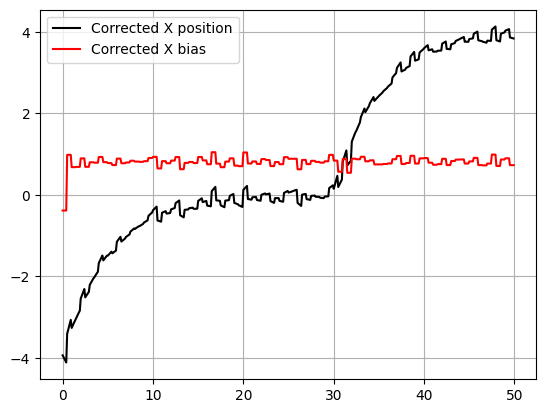

In [33]:
# Estimate for x position
plot_x = Plot(len(time))

for i in df_rows.astype(int):
  # Input variable + constant bias.
  U = np.array([[vx[i] - vx[0]]])

  # Measured variable.
  if np.array([[x[i]]]) != 0:
    Y = np.array([[x[i]]])

  (X, P) = kf.predict(X, P, A, Q, B, U)

  if i%5 == 0:
    (X, P) = kf.update(X, P, Y, H, R)
  
  plot_x.update(i, X[0, 0], X[1, 0])

plot_x.plot(time)

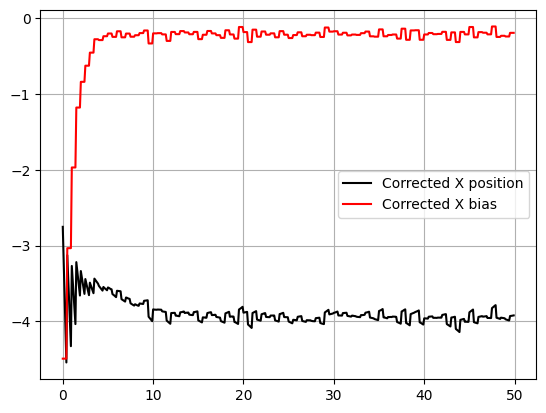

In [34]:
# Estimate for y position
kf = KalmanFilter()
plot_y = Plot(len(time))

for i in df_rows.astype(int):
  # Input variable + constant bias.
  U = np.array([[vy[i] - vy[0]]])

  # Measured variable.
  Y = np.array([[y[i]]])

  (X, P) = kf.predict(X, P, A, Q, B, U)

  if i%5 == 0:
    (X, P) = kf.update(X, P, Y, H, R)
  
  plot_y.update(i, X[0, 0], X[1, 0])

plot_y.plot(time)

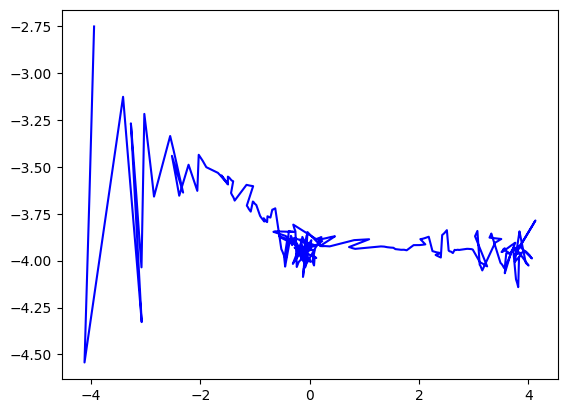

In [35]:
# Trajectory 2D
plt.plot(plot_x.XPx, plot_y.XPx, color='blue',label="Estimated trajectory 2D")
plt.show()

# **Part 2: Linear Regression**



In this part, the aim is to build a map of the environment by combining the position of the robot with the measurements of the 2D **LIDAR** that is on-board of the robot. The LIDAR measurements consist of range (distance) from the robot to a possible obstacle for each degree of direction, that is, 
$$
r_t = \{r_\beta + \eta_r : \beta=-179^o, -178^o, \ldots, 0^o, \ldots, 180^o\}
$$
where $\eta_r$ is assumed to be Gaussian noise. The sample time is the same, that is, $h=0.1\,s$, but the LIDAR measurements are outputted every time step $t=0,0.5,1.0, 1.5, \ldots$ (in seconds) like the robot position in the previous exercise. Moreover, if there is no obstacle within the direction of the laser range or if it is far away, that is, if the distance is greater than $5\,m$, by convention the range measurement is set to zero. It may also happen that the LIDAR in some cases may output an *outlier*.

The next figure shows $r_t$ as a function of the angle $\beta$ for $t=5.0\,s$.

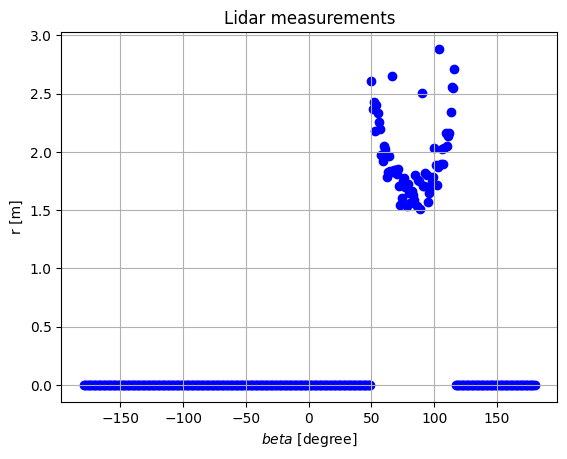

In [36]:
# Example
import numpy as np
time = df["time"].values
Lidar_range = df.iloc[:, np.arange(5,365,1)].values

t = int(5*(1/dt)) # t = 5 sec * 1/sample_time
angle = np.linspace(-179, 180, num=360)

plt.figure()
plt.scatter(angle, Lidar_range[t], color='b')
plt.title('Lidar measurements')
plt.ylabel('r [m]')
plt.xlabel('$beta$ [degree]')
plt.grid()

**2.1**
Using the estimated position of the robot (computed in the previous exercise) and the LIDAR data, 
1. Obtain the cloud points in the 2D plan that the robot sense at **$t=5\,s$** and plot them. Do not forget to remove the zero ranges and note that  

$$
\begin{align*}
\hat x_{o,t} = \hat x_t + r_t \cos\beta \\
\hat y_{o,t} = \hat y_t + r_t \sin\beta
\end{align*}
$$

2. Perform a linear regression for the previous data using a model of the type
\begin{equation} \color{green} { y = \theta_0 + \theta_1 x } 
 \end{equation}
and display the results, that is, display the resulting 2d map, the mean square error, and the optimal parameters for $\color{green} \theta$. To this end, apply the related Least Square (LS) normal equations and **only use** the sklearn to confirm the obtained values.



### Part 2.1.1

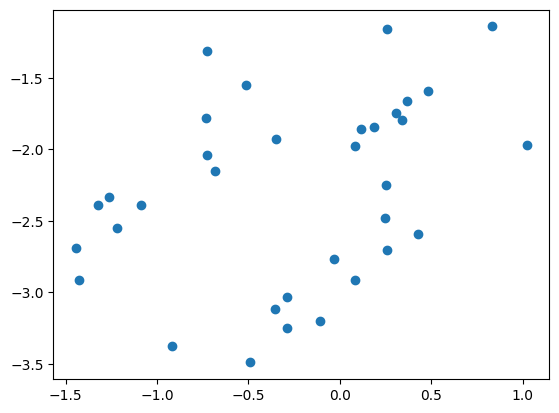

In [37]:
# Plotting cloud points
# for observation n in t seconds
t = 5
n = int(5*(1/dt))
x_o, y_o = [plot_x.XPx[n] + i for i in Lidar_range[n] * np.cos(angle) if i > 0], [plot_y.XPx[n] + i for i in Lidar_range[n] * np.sin(angle) if i > 0]

# plot 2D plan
plt.scatter(x_o, y_o)

### Part 2.1.2

In [38]:
# Linear Regression Class
from scipy import linalg
import numpy as np
from sklearn.metrics import mean_squared_error

class LinearRegressionManual:
    """Class to do linear regression."""
    def __init__(self, X, Y) -> None:
        ones = np.ones((len(X), 1), dtype=float)
        self.X = np.concatenate((ones, X), axis=1)
        self.Y = Y

    def theta(self) -> None:
        try:
            self.theta = linalg.inv(self.X.T @ self.X) @ (self.X.T @ self.Y)
        except np.linalg.LinAlgError as error:
            if 'singular matrix' in str(error):
                print('X.T @ X is a singular matrix. Using SVD to calculate pseudo inverse.')
                M = self.X.T @ self.X
                U, s, v = np.linalg.svd(M, full_matrices=True)
                s_inv = np.zeros_like(M)
                s_inv[:M.shape[0], :M.shape[0]] = np.diag(1/s)
                X_pinv = v.T.dot(s_inv).dot(U.T)
                self.theta = X_pinv @ (self.X.T @ self.Y)
            else:
                raise
    
    def predict(self, X_predict):
        return X_predict @ self.theta

X.T @ X is a singular matrix. Using SVD to calculate pseudo inverse.
X.T @ X is a singular matrix. Using SVD to calculate pseudo inverse.
Mean Square Error: 
 X axis:  0.024558856483127205 
 Y axis:  0.024205861281532442
model_x theta:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
model_y theta:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


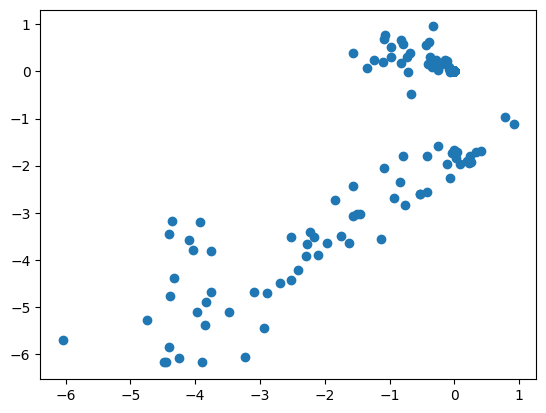

In [39]:
# Observations matrices for 0 <= t <= 5s
# for X axis
X_x = np.concatenate((plot_x.XPx[:n+1][:, np.newaxis], Lidar_range[:n+1, :]), axis=1)
Y_x = np.repeat(plot_x.XPx[:n+1][:, np.newaxis], len(Lidar_range[0, :]), axis=1) + Lidar_range[:n+1, :] * np.repeat(np.cos(angle)[np.newaxis, :], n+1, axis=0)

# Clean zero ranges
i = 0
for row in range(0, len(Y_x)):
    for element in range(0, len(Y_x[row])):
        if Y_x[row, element] == plot_x.XPx[row]:
            Y_x[row, element] = 0
    i += 1

# For Y axis
X_y = np.concatenate((plot_y.XPx[:n+1][:, np.newaxis], Lidar_range[:n+1, :]), axis=1)
Y_y = np.repeat(plot_y.XPx[:n+1][:, np.newaxis], len(Lidar_range[0, :]), axis=1) + Lidar_range[:n+1, :] * np.repeat(np.cos(angle)[np.newaxis, :], n+1, axis=0)

# Clean zero ranges
i = 0
for row in range(0, len(Y_y)):
    for element in range(0, len(Y_y[row])):
        if Y_y[row, element] == plot_y.XPx[row]:
            Y_y[row, element] = 0
    i += 1

# Estimate for X axis
model_x = LinearRegressionManual(X_x, Y_x)
model_x.theta()
Y_x_predicted = model_x.predict(model_x.X)

# Estimate for Y axis
model_y = LinearRegressionManual(X_y, Y_y)
model_y.theta()
Y_y_predicted = model_y.predict(model_y.X)

# 2D map
plt.scatter(Y_x_predicted[n], Y_y_predicted[n])

# Mean square error
mse_x = mean_squared_error(Y_x, Y_x_predicted)
mse_y = mean_squared_error(Y_y, Y_y_predicted)

print('Mean Square Error: \n', 'X axis: ', mse_x, '\n', 'Y axis: ', mse_y)

# Theta
print('model_x theta: ', model_x.theta)
print('model_y theta: ', model_y.theta)

**2.2**
Repeat the previous exercise but now with a polynomial model of the type 
$$\begin{equation} \color{green} { y = \theta_0 + \theta_1 x + \theta_2 x^2 } 
 \end{equation}
$$


X.T @ X is a singular matrix. Using SVD to calculate pseudo inverse.
X.T @ X is a singular matrix. Using SVD to calculate pseudo inverse.
Mean Square Error: 
 X axis:  0.024510549528141364 
 Y axis:  0.2320339888415924
model_x theta:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
model_y theta:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


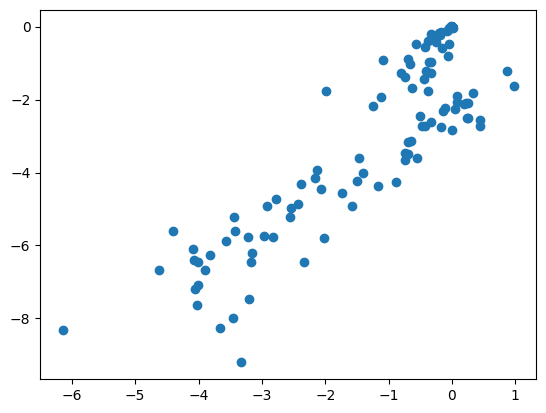

In [40]:
# X observations matrix adapted from previous exercise
X_x_2 = np.concatenate((X_x, X_x*X_x), axis=1)
X_y_2 = np.concatenate((X_y, X_y*X_y), axis=1)

# Estimate for X axis
model_x_2 = LinearRegressionManual(X_x_2, Y_x)
model_x_2.theta()
Y_x_2_predicted = model_x_2.predict(model_x_2.X)

# Estimate for Y axis
model_y_2 = LinearRegressionManual(X_y_2, Y_y)
model_y_2.theta()
Y_y_2_predicted = model_y_2.predict(model_y_2.X)

# 2D map
plt.scatter(Y_x_2_predicted[n], Y_y_2_predicted[n])

# Mean square error
mse_x_2 = mean_squared_error(Y_x, Y_x_2_predicted)
mse_y_2 = mean_squared_error(Y_y, Y_y_2_predicted)

print('Mean Square Error: \n', 'X axis: ', mse_x_2, '\n', 'Y axis: ', mse_y_2)

# Theta
print('model_x theta: ', model_x_2.theta)
print('model_y theta: ', model_y_2.theta)

**2.3**
At this point you can use sklearn! 
Do the same as the previous exercise (polynomial model) but now with **degree 10**. Moreover, implement also a regression with **Ridge** regularization and a regression with **LASSO** regularization. Do not forget to display the obtained results. What can you conclude?




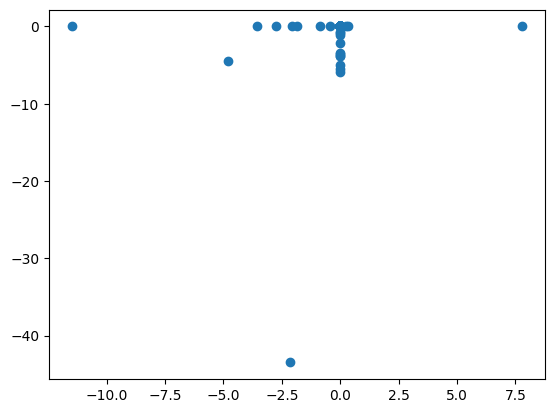

In [213]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd

# Instantiate order-10 polynom object
nb_degree = 10
polynomial_features = PolynomialFeatures(degree = nb_degree, include_bias=False)

# Fit transform for each combination of estimated position and LIDAR range angle observation separatly
X_coef = np.zeros_like(Y_x[1], dtype=object)[:, np.newaxis]
X_intercept = np.zeros_like(Y_x[1], dtype=object)[:, np.newaxis]
Y_x_predicted = []
mse = []
for c in range(1, X_x.shape[1]):
    X_part = np.concatenate((X_x[:, 0][:, np.newaxis], X_x[:, c][:, np.newaxis]), axis=1)
    X_TRANSF = polynomial_features.fit_transform(X_part)
    X_train, X_test, y_train, y_test = train_test_split(X_TRANSF, Y_x[:, c-1][:, np.newaxis], test_size=0.3)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    Y_x_predicted.append(y_predicted[-1])
    mse.append(mean_squared_error(y_test, y_predicted))

    # Save coefficients and intercepts
    X_coef[c-1][0] = model.coef_
    X_intercept[c-1][0] = model.intercept_

Y_coef = np.zeros_like(Y_x[1], dtype=object)[:, np.newaxis]
Y_intercept = np.zeros_like(Y_x[1], dtype=object)[:, np.newaxis]
Y_y_predicted = []
mse = []
for c in range(1, X_x.shape[1]):
    X_part = np.concatenate((X_y[:, 0][:, np.newaxis], X_y[:, c][:, np.newaxis]), axis=1)
    X_TRANSF = polynomial_features.fit_transform(X_part)
    X_train, X_test, y_train, y_test = train_test_split(X_TRANSF, Y_y[:, c-1][:, np.newaxis], test_size=0.3)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    Y_y_predicted.append(y_predicted[-1])
    mse.append(mean_squared_error(y_test, y_predicted))

    # Save coefficients and intercepts
    X_coef[c-1][0] = model.coef_
    X_intercept[c-1][0] = model.intercept_

# Remove outliers and plot 2D plan
xy = np.concatenate((Y_x_predicted, Y_y_predicted), axis=1)
xy[:, 0].min()
xy[:, 1].max()
xy_clean = xy[xy[:, 0] != xy[:, 0].min()]
xy_clean = xy_clean[xy_clean[:, 1] != xy_clean[:, 1].max()]
plt.scatter(xy_clean[:, 0], xy_clean[:, 1])

**2.4**
We now would like to use all the LIDAR data. One simple option (off-line) is to make a data set with all the cloud point positions in 2D and apply the linear regression techniques.

Using sklearn, do this for LS, LS+Ridge, LS+LASSO using the polynomial model of degree 10. Display the results (map 2D) and the optimal values for 
$\color{green} \theta$.


In [45]:
# Observations matrices
size_1 = len(plot_x.XPx)
size_2 = len(Lidar_range.T)

# for X axis
X_x = plot_x.XPx[:, np.newaxis]
Y_x = np.repeat(plot_x.XPx[:, np.newaxis], size_2, axis=1) + Lidar_range * np.repeat(np.cos(angle)[np.newaxis, :], size_1, axis=0)

# Clean zero ranges
i = 0
for row in range(0, len(Y_x)):
    for element in range(0, len(Y_x[row])):
        if Y_x[row, element] == plot_x.XPx[row]:
            Y_x[row, element] = 0
    i += 1

# for Y axis
X_y = plot_y.XPx[:, np.newaxis]
Y_y = np.repeat(plot_y.XPx[:, np.newaxis], size_2, axis=1) + Lidar_range * np.repeat(np.cos(angle)[np.newaxis, :], size_1, axis=0)

# Clean zero ranges
i = 0
for row in range(0, len(Y_y)):
    for element in range(0, len(Y_y[row])):
        if Y_y[row, element] == plot_y.XPx[row]:
            Y_y[row, element] = 0
    i += 1

In [71]:
# 2D dataset
Y_xy = np.zeros_like(Y_x, dtype=object)
for l in range(0, len(Y_xy.T[0])):
    for c in range(0, len(Y_xy[0])):
        Y_xy[l, c] = np.array([Y_x[l, c], Y_y[l, c]])

X_xy = np.zeros_like(X_x, dtype=object)
for l in range(0, X_xy.shape[0]):
    X_xy[l, 0] = np.array([X_x[l, 0], X_y[l, 0]])        
X_xy = np.concatenate((X_xy, Lidar_range), axis=1)

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error

nb_degree = 10
polynomial_features = PolynomialFeatures(degree = nb_degree, include_bias=False)

PolynomialFeatures(degree=10, include_bias=False)

**2.5 (Extra)** 
Another option (on-line) is to make a linear regression with only the LIDAR data that is being acquired at each snapshot of time $t=0, 0.5, 1.0, \ldots$ and update the optimal value $\color{green} \theta$ using a gradient descent rule
$$
\color{green}
{\theta_{t+1}=\theta_t - \gamma \nabla J(\theta_t),}
$$
where $\color{green} \gamma>0$ is the learning rate, and $\color{green}
 {\nabla J(\theta_{t})}$ is the gradient at each snapshot of the cost
$$
\color{green}
{J(\theta) = \sum_{n=1}^N \big(y_n-\theta^{T} \phi(x_n)\big)^2 }
$$
where $N$ is the number of valid (that is non zero) range measurements at instant $t$.

Implement this strategy and plot the results.

**Note:** This question is optional. If you solve it, you get extra 15 points (in 100).

In [ ]:
# To complete
